# **Assignment_2**

## **Data Visualization and Pre-processing**

**Tasks:-**
1. Download the dataset: Dataset
2. Load the dataset.
3. Perform Below Visualizations. 
*   Univariate Analysis
*   Bi - Variate Analysis
*   Multi - Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Handle the Missing values.
6. Find the outliers and replace the outliers
7. Check for Categorical columns and perform encoding.
8. Split the data into dependent and independent variables.
9. Scale the independent variables
10. Split the data into training and testing

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

**2. Load the dataset**

In [68]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## **3. Visualizations**

**3.1. Univariate Analysis**

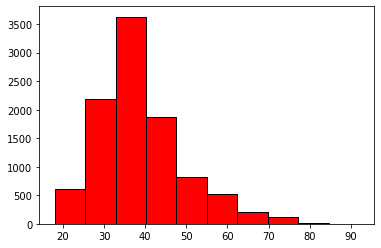

In [69]:
plt.hist(df['Age'], edgecolor='black',color='red')
plt.show()

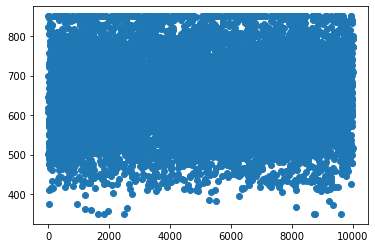

In [70]:
plt.scatter(df.index,df['CreditScore'])
plt.show()

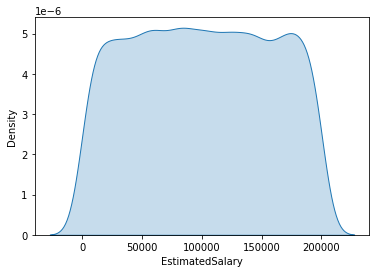

In [71]:
sns.kdeplot(df['EstimatedSalary'],shade=True)
plt.show()

**3.2. Bi-Variate Analysis**

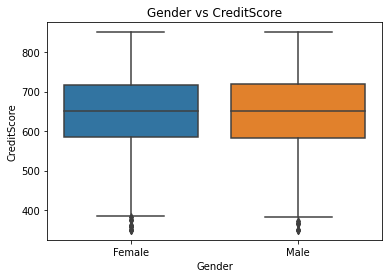

In [72]:
sns.boxplot(x = df['Gender'], y = df["CreditScore"])
plt.title("Gender vs CreditScore")
plt.show()

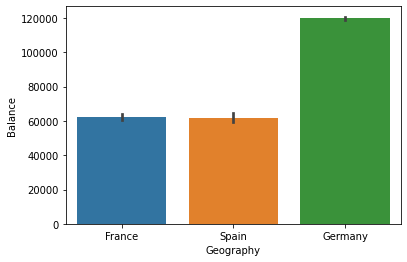

In [73]:
sns.barplot(x=df["Geography"],y=df["Balance"])
plt.show()

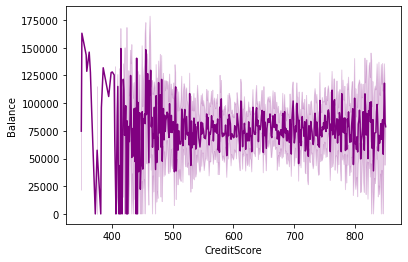

In [74]:
sns.lineplot(x=df["CreditScore"],y=df["Balance"], color='purple')
plt.show()

**3.3. Multi-Variate Analysis**

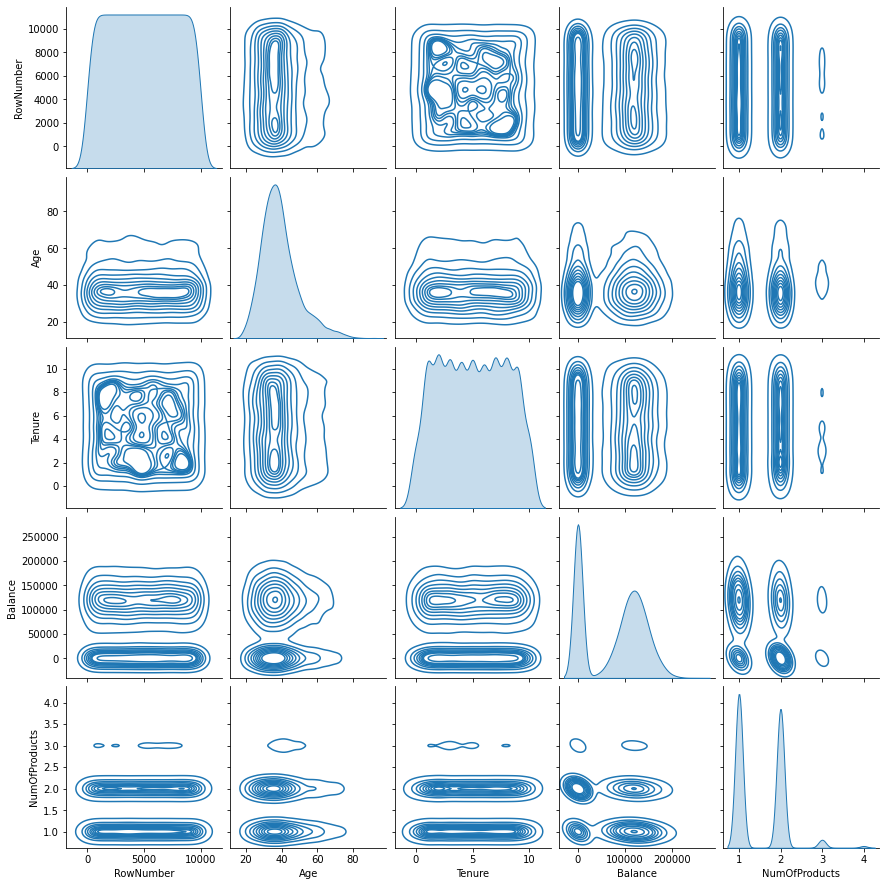

In [75]:
sns.pairplot(data=df[["RowNumber","Age","Tenure","Balance","NumOfProducts"]],kind="kde")
plt.show()

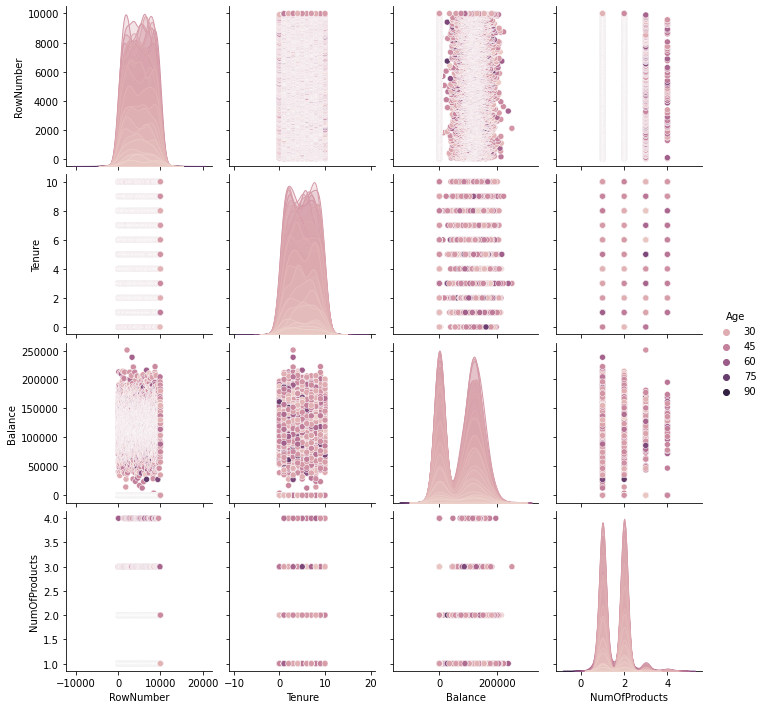

In [76]:
sns.pairplot(data=df[["RowNumber","Age","Tenure","Balance","NumOfProducts"]], hue="Age")
plt.show()

**4. Descriptive statistics on the dataset**

In [77]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [78]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [79]:
df.groupby(['CreditScore','EstimatedSalary']).mean()

RowNumber  CustomerId   Age  Tenure    Balance  \
CreditScore EstimatedSalary                                                   
350         113796.15           8763.0  15765173.0  60.0     3.0       0.00   
            123602.11           1839.0  15758813.0  39.0     0.0  109733.20   
            125823.79           8724.0  15803202.0  51.0    10.0       0.00   
            172321.21           9625.0  15668309.0  40.0     0.0  111098.85   
            191973.49           1632.0  15685372.0  54.0     1.0  152677.48   
...                                ...         ...   ...     ...        ...   
850         197266.58           6646.0  15648989.0  37.0     4.0  126872.60   
            197996.65           1485.0  15607713.0  29.0     1.0       0.00   
            198193.75           2943.0  15715541.0  42.0     9.0  113311.11   
            199693.84           4548.0  15672152.0  37.0     9.0  122506.38   
            199775.67           3831.0  15720713.0  29.0    10.0       0.00   

                             NumOfProducts  HasCrCard  IsActiveMember  Exited  
CreditScore EstimatedSalary                                                    
350         113796.15                  1.0        0.0             0.0     1.0  
            123602.11                  2.0        0.0             0.0     1.0  
            125823.79                  1.0        1.0             1.0     1.0  
            172321.21                  1.0        1.0             1.0     1.0  
            191973.49                  1.0        1.0             1.0     1.0  
...                                    ...        ...             ...     ...  
850         197266.58                  1.0        1.0             0.0     0.0  
            197996.65                  2.0        1.0             1.0     0.0  
            198193.75                  1.0        1.0             1.0     0.0  
            199693.84                  1.0        0.0             1.0     1.0  
            199775.67                  2.0        1.0             1.0     0.0  

[10000 rows x 9 columns]

In [80]:
df['Age'].std()


10.487806451704609

**5. Handle the Missing values.**

There is no missing values for the given dataset.
However, if there are missing values present, we can perform the following:


*   For categorical column, we can replace missing values with the mode value
*   For continuous columns, we can replace missing values with the mean value of that column

**Syntax:** df['CreditScore'] = dataset['CreditScore'].fillna(dataset['CreditScore'].mean())

In [81]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Visualizing missing values**

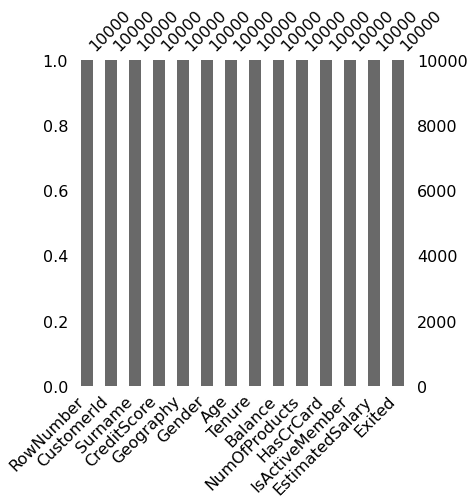

In [82]:
import missingno as msno
msno.bar(df,figsize=(6, 6))
plt.show()

**6. Find the outliers and replace the outliers**

In [83]:
outlier=df.quantile(q=(0.25,0.75))
outlier

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


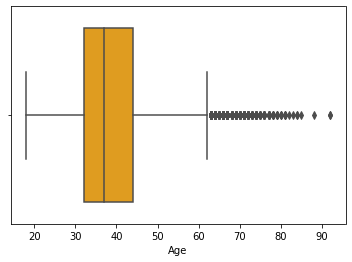

In [84]:
sns.boxplot(x=df["Age"],color='orange')
plt.show()

In [85]:
age=np.where(df["Age"]<30,50,df["Age"])
age

array([42, 41, 42, ..., 36, 42, 50])

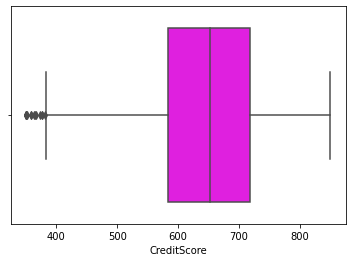

In [86]:
sns.boxplot(x=df["CreditScore"],color='magenta')
plt.show()

In [87]:
credit=np.where(df["CreditScore"]<400,800,df["CreditScore"])
credit

array([619, 608, 502, ..., 709, 772, 792])

**7. Check for Categorical columns and perform encoding.**


In [92]:
encoder = LabelEncoder()
df['Geography']= encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Surname']=encoder.fit_transform(df['Surname'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**8. Split the data into dependent and independent variables.**

In [94]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1:]

**9. Scale the independent variables**

In [95]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaledX = scale.fit_transform(X)
scaledX

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

**10. Split the data into training and testing**

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [97]:
print("X_train size=",X_train.size)
print("X_test size=",X_test.size)
print("y_train size=",y_train.size)
print("y_test size=",y_test.size)

X_train size= 104000
X_test size= 26000
y_train size= 8000
y_test size= 2000
